### Damage_Part_json ###

```
{'info': {'name': 'external', 'date_created': '03/08/2022'}, 
'images': {'id': 1, 'width': 800, 'height': 600, 'file_name': '0000015_as-0031772.jpg'}, 

'annotations': 
[
    {'id': 2, 
    'image_id': 1, 
    'category_id': 'as-0031772', 
    'segmentation': [[[[595, 374], [593, 375], [595, 365], [604, 357], [640, 344], [658, 339], [662, 345], [674, 348], [667, 357], [652, 360], [635, 361], [614, 376], [595, 374]]]], 
    'area': 1306.0, 
    'bbox': [593, 339, 81, 37], 
    'damage': 'Crushed', 
    'part': None, 
    'year': 2015, 
    'color': 'Black', 
    'level': None, 
    'repair': []}, 
    
    {'id': 5, 
    'image_id': 1, 
    'category_id': 'as-0031772', 
    'segmentation': [[[[311, 220], [327, 221], [417, 219], [506, 215], [561, 208], [605, 199], [640, 187], [666, 174], [681, 194], [669, 207], [652, 216], [650, 220], [650, 226], [658, 261], [660, 263], [663, 264], [684, 256], [686, 252], [685, 269], [679, 275], [675, 284], [674, 296], [676, 322], [676, 332], [668, 344], [612, 374], [575, 389], [511, 411], [459, 426], [410, 439], [392, 442], [380, 442], [367, 434], [354, 410], [347, 390], [341, 365], [337, 342], [400, 330], [410, 324], [421, 315], [430, 292], [435, 273], [434, 262], [430, 259], [316, 261], [311, 220]]]], 
    'area': 58879.5, 
    'bbox': [311, 174, 375, 268], 
    'damage': None, 
    'part': 'Trunk lid', 
    'year': 2015, 
    'color': 'Black', 
    'level': 4, 
    'repair': []}, 
    
    {'id': 6, 
    'image_id': 1, 
    'category_id': 'as-0031772', 
    'segmentation': [[[[118, 382], [127, 378], [176, 395], [189, 398], [196, 392], [205, 348], [208, 335], [210, 331], [224, 341], [246, 346], [282, 347], [324, 343], [335, 341], [341, 360], [346, 387], [353, 410], [363, 428], [370, 438], [382, 443], [409, 440], [454, 428], [522, 408], [575, 390], [614, 373], [642, 360], [661, 349], [669, 343], [672, 338], [676, 330], [677, 320], [678, 325], [677, 341], [678, 349], [684, 361], [692, 376], [690, 393], [679, 420], [672, 424], [669, 434], [631, 461], [597, 481], [546, 505], [509, 522], [452, 543], [405, 561], [371, 572], [359, 572], [326, 578], [300, 581], [267, 573], [228, 560], [200, 550], [167, 492], [142, 441], [130, 411], [118, 382]]]], 
    'area': 77193.5, 
    'bbox': [118, 320, 574, 261], 
    'damage': None, 
    'part': 'Rear bumper', 
    'year': 2015, 
    'color': 'Black', 
    'level': 4, 
    'repair': []}
], 
'categories': {'id': 'as-0031772', 'supercategory_name': 'Mid-size car'}}
```

In [1]:
import os
import json
import glob
import cv2
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
### cocodata의 breakage 대상 이미지 갯수 확인하기 ###

import pandas as pd
import numpy as np

df = pd.read_csv("./damage_labeling.csv")

train = df.loc[df['dataset'] == 'train']['index']

train_list = []


for i in range(len(train)):
    train_list.append(train.values[i])

# train_list


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from PIL import Image

# train_list
json_path = "../data/Dataset/2.라벨링데이터/damage/"

import json

cnt = 0

for i in train_list:
        with open(json_path + i.replace('.jpg', '.json'), 'r') as f:
                damage = json.load(f)
        
        for j in range(len(damage['annotations'])):
                type = damage['annotations'][j]['damage']
                

                if type == 'Breakage':
                        cnt += 1
                        # cnt
        

cnt


32

In [60]:
### list 차원 축소 test ###

list1 = [[[1,2], [3,4]]]
list1[0][0]

list2 = [[[1,2], [3,4], [5,6], [7,8]]]
sum(list2, [])

list3 = [[[[[12,13], [14,15]], [[16,17], [18,19]]]]]
third = sum(list3[0], [])
second1 = third[0]
second2 = third[1]
second1
second2

list4 = [[[[[10,11], [12,13], [14,15]]]]]
sum(list4[0][0], [])

[1, 2]

[[1, 2], [3, 4], [5, 6], [7, 8]]

[[12, 13], [14, 15]]

[[16, 17], [18, 19]]

[[10, 11], [12, 13], [14, 15]]

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pycocotools.coco import COCO


### 원하는 형태로 만들어진 json파일에서 ###
### 각 이미지의 기본 정보 불러오기 ###
part_img_sample = './part_train_rev.json'

coco = COCO(part_img_sample)

img_ids = coco.getImgIds()
image_id = int(img_ids[0])
image_infos = coco.loadImgs(image_id)[0]

#img_ids
image_id
image_infos
coco.loadImgs(image_id)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


1

{'id': 1, 'width': 800, 'height': 600, 'file_name': '0000008_as-0036229.jpg'}

[{'id': 1, 'width': 800, 'height': 600, 'file_name': '0000008_as-0036229.jpg'}]

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


### segmentation좌표로 polygon만들기 ###
mask1 = np.zeros((800,600, 3), np.uint8) # 파일크기
polygon1 = np.array(
[[206, 530], [222, 520], [256, 521], [273, 534], [302, 541], [353, 540], 
[511, 537], [538, 521], [572, 521], [576, 531], [543, 536], [533, 538], 
[524, 545], [489, 548], [334, 545], [267, 538], [254, 531], [206, 530]])

polygon2 = np.array(
 [[90, 505], [93, 506], [96, 510], [104, 516], [132, 523], [131, 524], 
 [104, 520], [90, 515], [89, 512], [89, 508], [90, 505]])
 

mask1 = cv2.fillPoly(mask1, [polygon1, polygon2], (255, 255,0))

cv2.imwrite('./test.png', mask1)


True

In [ ]:
### 차원이 다른 segmentation 정보 다루기 test ###

### json파일 불러와서 읽기 ###
import json
with open('./src/part_train.json', 'r') as f:
        part = json.load(f)

### seg: seg 정보, res: 원하는 형태로 변환된 seg좌표 ###
seg = []
res = []

### 한 차원 안에 두개의 seg좌표가 있는 seg정보 걸러내서 차원 합치기 ###
for i in part['annotations']:
        for j in np.squeeze(i['segmentation']):
                print(len(i['segmentation'][0]))
                if len(i['segmentation'][0]) >= 2:
                        seg = sum(j, seg)
                        res.append(np.asarray(seg.copy(), dtype=int).tolist())
                        seg.clear()
                else:
                        seg.extend(j)
        if len(i['segmentation'][0]) >= 2:
                #print(res)
                i['segmentation'] = res.copy()
        else:
                i['segmentation'] = np.asarray([seg.copy()], dtype=int).tolist()
                seg.clear()
        res.clear()


with open('./part_test_rev.json', 'w') as f:
        #print(type(part), type(f))
        json.dump(part, f)

In [4]:
### (Part_json) segmentation좌표를 이용해 각 이미지에 대한 mask이미지 만들기 ###


import json
with open('./src/part_train.json', 'r') as f:
        part = json.load(f)

len(part['images'])


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

part_json = './src/part_train.json'

coco = COCO(part_json)

img_ids = coco.getImgIds()

# len(part['images'])


for i in range(0, 3):
        image_id = int(img_ids[i])

        image_infos = coco.loadImgs(image_id)[0]
        width = image_infos['width']
        height = image_infos['height']
        

        image_seg = coco.loadAnns(image_id)[0]['segmentation']


        if len(image_seg[0][0]) > 1:
                mask = np.zeros((width,height, 3),dtype = np.uint8)

                cv2.fillPoly(mask,image_seg[0][0], (0,255,0))
                cv2.imwrite(f'{image_id}.png', mask)

        
        else:
                second_dim = sum(image_seg[0][0], [])
                mask = np.zeros((width,height, 3),dtype = np.uint8)

                polygon1 = np.array(second_dim)

                cv2.fillPoly(mask,[polygon1],(0,255,0))
                cv2.imwrite(f'{image_id}.png', mask)

80

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

True

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

True

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

True

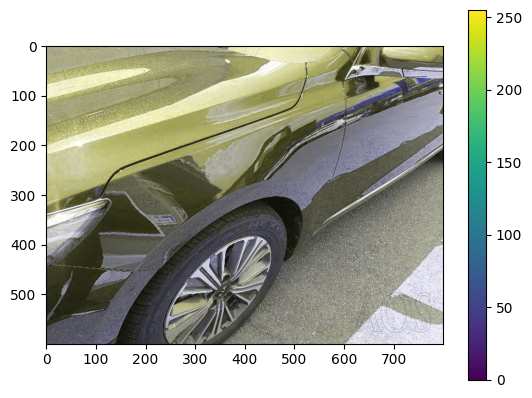

[[[182 181 150]
  [177 176 145]
  [175 174 143]
  ...
  [187 188 112]
  [185 186 110]
  [185 186 110]]

 [[176 175 144]
  [175 174 143]
  [177 176 145]
  ...
  [185 186 110]
  [185 186 110]
  [185 186 110]]

 [[171 170 139]
  [172 171 140]
  [176 175 144]
  ...
  [183 184 108]
  [184 185 109]
  [185 186 110]]

 ...

 [[ 71  70  84]
  [ 59  58  72]
  [ 89  88 102]
  ...
  [221 221 233]
  [225 225 237]
  [234 234 246]]

 [[ 84  83  97]
  [ 96  95 109]
  [ 91  90 104]
  ...
  [246 246 255]
  [240 240 252]
  [244 244 255]]

 [[ 81  80  94]
  [118 117 131]
  [ 76  75  89]
  ...
  [233 233 245]
  [231 231 243]
  [246 246 255]]]


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

part_img_sample = '../data/Dataset/1.원천데이터/damage_part/0000001_as-2866890.jpg'

img = Image.open(part_img_sample)
imgArray = np.array(img)
imgArray.shape

plt.figure()
plt.imshow(imgArray)
plt.colorbar()
plt.grid(False)
plt.show()

print(imgArray)